In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

def get_file_names(folder_path):
    """
    Returns a list of file names in the given folder.

    Parameters:
    folder_path (str): The path to the folder.

    Returns:
    list: A list of file names in the folder.
    """
    files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    return files

missed_data_path = 'data/missed'
missed_data_points = get_file_names(missed_data_path)

passive_data_path = 'data/passive'
passive_data_points = get_file_names(passive_data_path)

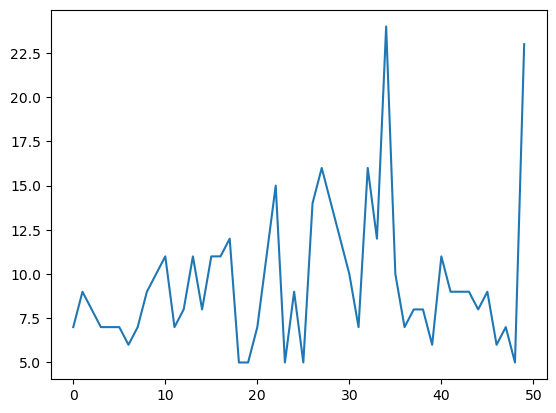

In [2]:
missed_data = np.load(f'{missed_data_path}/{missed_data_points[1]}')
missed_ex = np.max(missed_data, 1)
plt.plot(missed_ex)
plt.show()

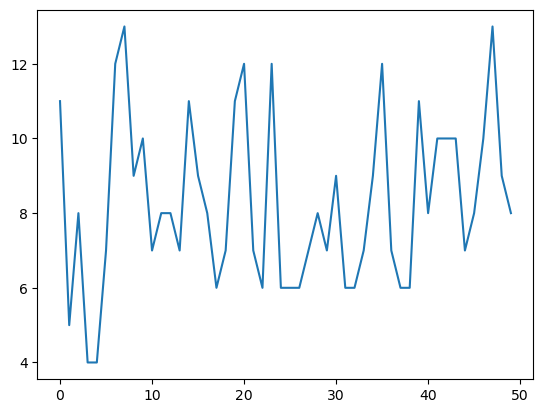

In [115]:
passive_data = np.load(f'{passive_data_path}/{passive_data_points[1]}')
passive_ex = np.max(passive_data, 1)
plt.plot(passive_ex)
plt.show()

In [117]:
def create_df(filepath, file_names):
    df = np.zeros((len(file_names), 50))
    i = 0 
    for file in file_names:
        data = np.load(f'{filepath}/{file}')
        max = np.max(data, 1)
        df[i] = max
        i += 1
    return pd.DataFrame(df)

missed = create_df(missed_data_path, missed_data_points)
missed['missed'] = 1

In [118]:
passive = create_df(passive_data_path, passive_data_points)
passive['missed'] = 0

In [119]:
df = pd.concat([missed[:45], passive])

In [120]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import numpy as np

def bootstrap_evaluation(X, y, n_iterations=10, test_size=0.3):
    """
    Perform bootstrap evaluation of logistic regression model.

    Parameters:
    X (DataFrame): Feature matrix.
    y (Series): Target vector.
    n_iterations (int): Number of bootstrap samples to create.
    test_size (float): Proportion of dataset to include in the test split.

    Returns:
    np.array: Array of accuracy scores from each iteration.
    """
    accuracies = []

    for _ in range(n_iterations):
        # Create a bootstrap sample
        X_sample, y_sample = resample(X, y)

        # Split the bootstrap sample into training and test sets
        X_train, X_test = np.split(X_sample, [int((1 - test_size) * len(X_sample))])
        y_train, y_test = np.split(y_sample, [int((1 - test_size) * len(y_sample))])

        # Create and train the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Evaluate the model
        score = model.score(X_test, y_test)
        accuracies.append(score)

    return np.array(accuracies)

# Assuming df is your DataFrame and 'missing' is the binary target column
X = df.drop('missed', axis=1)  # Features
y = df['missed']  # Binary target (already encoded as 0/1)

# Perform bootstrap evaluation
scores = bootstrap_evaluation(X, y)

# Print average accuracy
print("Average accuracy:", np.mean(scores))


Average accuracy: 0.7642857142857145


In [123]:
missed_data[0].shape

(1085,)